In [ ]:
import numpy as np
from scipy.stats import norm
from statsmodels.stats.weightstats import ztest

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
np.random.seed(0)

In [ ]:
N = 100
mu = 0.2
sigma = 1
X = np.random.randn(N)*sigma+mu

#two sided test
ztest(X) #by default this is one sample test to a default reference value of 0

(2.5648404153513686, 0.01032232684881584)

In [ ]:
#replicate the function above using our own code

mu_hat = X.mean()
sigma_hat = X.std(ddof=1)
z = mu_hat / (sigma_hat / np.sqrt(N)) #note our mu_0 = 0
p_right = 1 - norm.cdf(np.abs(z)) # you can also use the norm.sf function instead of 1-cdf(..)
p_left = norm.cdf(-np.abs(z))
p = p_right + p_left

In [ ]:
print(z)
print(p)

2.564840415351368
0.010322326848815901


In [ ]:
# one-sided test
ztest(X, alternative="larger")

(2.5648404153513686, 0.00516116342440792)

In [ ]:
#derivate above by myself
p = 1 - norm.cdf(z)
print(z)
print(p)

2.564840415351368
0.005161163424407977


In [ ]:
mu_0 = 0.2
ztest(X, value=mu_0)
#we can see that we fail to reject this null hypothesis

(0.5904283402851699, 0.5549035151647227)

In [ ]:
z2 = (mu_hat-mu_0) / (sigma_hat / np.sqrt(N)) #note our mu_0 = 0
p_right2 = 1 - norm.cdf(np.abs(z2)) # you can also use the norm.sf function instead of 1-cdf(..)
p_left2 = norm.cdf(-np.abs(z2))
p2 = p_right2 + p_left2

print(z2)
print(p2)

0.5904283402851698
0.5549035151647228


In [ ]:
#now two sample test

N1 = 100
mu1 = 0.2
sigma1 = 1
X1 = np.random.randn(N1)*sigma1 + mu1

N2 = 100
mu2 = 0.5
sigma2 = 1
X2 = np.random.randn(N2)*sigma2 + mu2

In [ ]:
ztest(X1, X2)
#again fail to reject the null hypothesis

(-1.1234612344369315, 0.2612416557056353)

In [ ]:
mu_hat1 = X1.mean()
mu_hat2 = X2.mean()
mu_diff = mu_hat1 - mu_hat2
sig_hat1 = X1.var(ddof=1)
sig_hat2 = X2.var(ddof=1)
sig_hat = np.sqrt(sig_hat1/N1 + sig_hat2/N2)
z = (mu_diff)/sig_hat # note reference value is 0
p_right = 1-norm.cdf(np.abs(z))
p_left = norm.cdf(-np.abs(z))
p = p_right + p_left

print(z)
print(p)

#the sign may be diff, which is fine because it depends on which data you consider as group1 and which is group2
#only time it matters is when we doing 1 sided test

-1.1234612344369315
0.26124165570563523


In [ ]:
#now we want to test that even tho the null hypothesis is really true (i.e. X1 = X2), the false alarm rate of the default set threshold 5% will hold true， i.e. for 5% of the time we will reject the null hypothesis 
num_tests = 10000
res = 0
size = 100
for i in range(num_tests):
  X1 = np.random.randn(size)
  X2 = np.random.randn(size) 
  #X1 and X2 are the same, hence the null hypothesis is true, they are from exact distribution
  z,p = ztest(X1, X2)
  res += (p<0.05)
print(res/num_tests) #check the false alarm rate

0.049


In [ ]:
!wget https://lazyprogrammer.me/course_files/titanic_train.csv

--2021-05-16 20:02:43--  https://lazyprogrammer.me/course_files/titanic_train.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/csv]
Saving to: ‘titanic_train.csv’

titanic_train.csv   100%[===================>]  59.76K  --.-KB/s    in 0.003s  

2021-05-16 20:02:44 (18.3 MB/s) - ‘titanic_train.csv’ saved [61194/61194]



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df[df['Survived']==1].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
#using the hypothesis test, we want to test if the fare paid by survived = 1 passengers vs survived = 0 passenger is the same (null hypothesis)
x1 = df[df['Survived']==1]['Fare'].dropna().to_numpy()
x2 = df[df['Survived']==0]['Fare'].dropna().to_numpy()
print(x1.mean())
print(x2.mean())

48.39540760233918
22.117886885245902


In [ ]:
ztest(x1,x2)

(7.939191660871055, 2.035031103573989e-15)

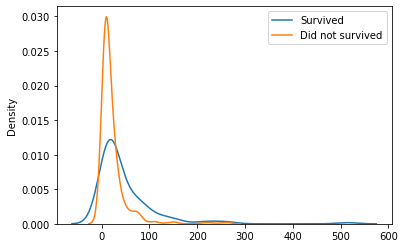

In [ ]:
#density plot for the two groups
sns.kdeplot(x1, label = "Survived")
sns.kdeplot(x2, label = "Did not survived")
plt.legend()

Example 2 with click rate

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/udemy/A B testing Baysian/advertisement_clicks.csv')

In [ ]:
df.head()

,advertisement_id,action
0,B,1
1,B,1
2,A,0
3,B,0
4,A,1


In [ ]:
x1 = df[df['advertisement_id']=='A']['action']
x2 = df[df['advertisement_id']=='B']['action']

ztest(x1,x2)
#we can reject the null hypothesis that the two website are equal in click rate

(-3.2211732138019786, 0.0012766696301529544)

In [ ]:
print(x1.mean())
print(x2.mean())

0.304
0.372


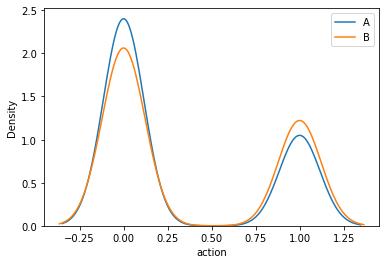

In [ ]:
#density plot for the two groups
sns.kdeplot(x1, label = "A")
sns.kdeplot(x2, label = "B")
plt.legend()